# NLP_Word Embedding2_TF_IDF Vectorization.

## Tf-Idf(Term frequency-Inverse document frequency)
**Wikipedia definition**: "Tf-ldf, short for term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The Tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. Tf-idf is one of the most popular term-weighting schemes today."

### Term Frequency (TF)
It is simply the frequency in which a word appears in a document in comparison to the total number words in the document. 


Mathematically given as:


*Term frequency = (Number of times a word appears in the document) / (Total number of words in the document)*

###  Inverse Document Frequency (IDF)
Term frequency has a disadvantage that it tends to give higher weights to words with higher frequency. In such cases words like 'a', 'the', 'in', 'of' etc. appears
more in the documents than other regular words. Thus, more important words are wrongly given lower weights as their frequency is less. To tackle this problem IDF was introduced. IDF decreases the weights of such high frequency terms and increases the weight of terms with rare occurrence. 


Mathematically it is given as:


*Inverse Document Frequency = log [ (Number of documents) / (Number of documents the word appears in) ]*


**note:[log has base2]**


#### Tf-Idf Score = Term frequency * Inverse Document Frequency

In [1]:
import numpy as np
np.log2(3)

1.584962500721156

Let's understand more with an example:

* Doc1: This is an example.
* Doc2: We will see how it works.
* Doc3: IDF can be confusing.

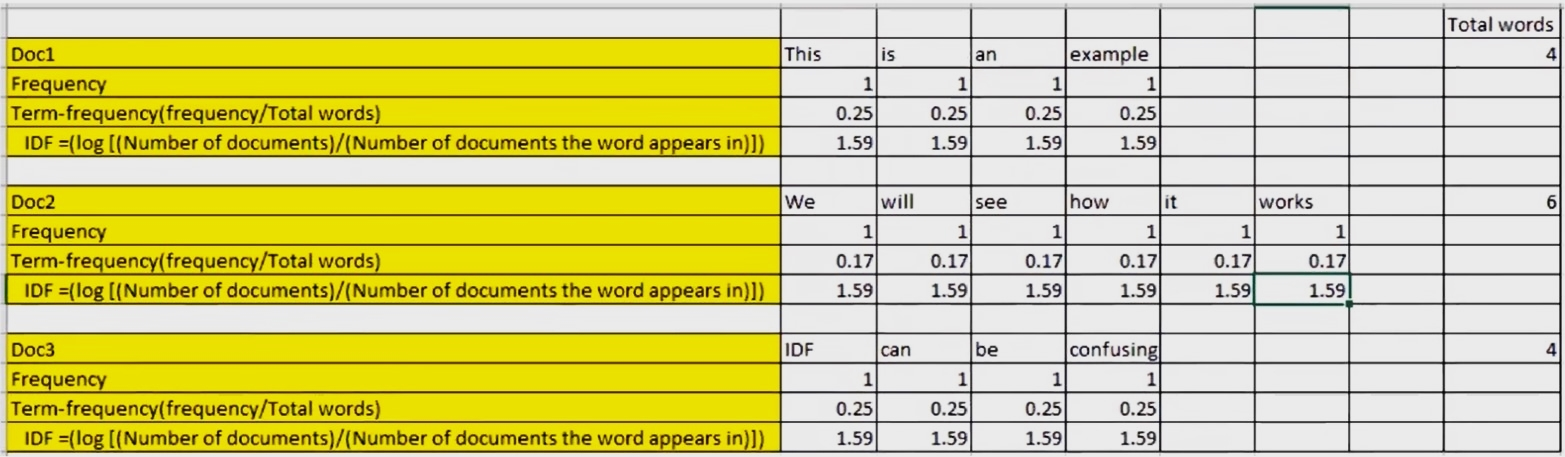

In the above table, we have calculated the term frequency as well as inverse document frequency of each of the words present in the 3 documents given.


Now, let's calculate the tf-idf score for each term. Since, words of one document is not present in another document, we will have tf-idf value 0 for them

e.g.
words of doc1 will have 0 tf-idf for doc2 and doc3.



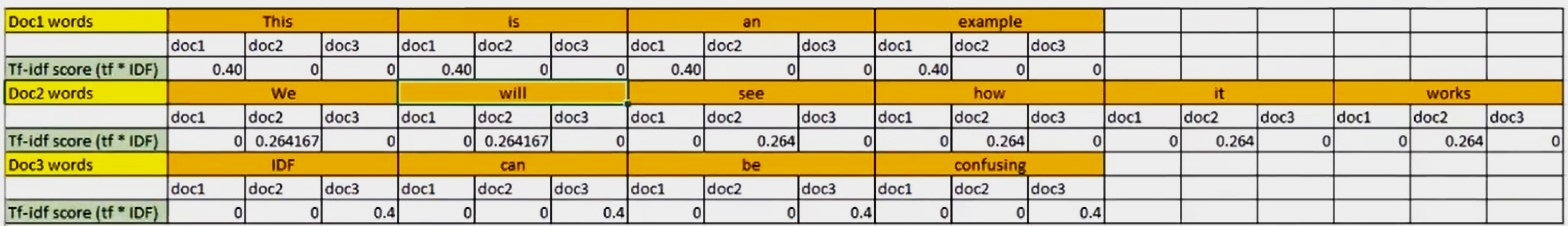

Great, hope this example must have cleared how Tf-ldf works.


let's see the python implementation for it:

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

tfid = TfidfVectorizer(smooth_idf=False)

doc = ["This is an example.","We will see how it works.","IDF can be confusing"]

doc_vector = tfid.fit_transform(doc)

#print(tfid.get_feature_names())

df = pd.DataFrame(doc_vector.todense(), columns= tfid.get_feature_names())
df

#print(doc_vector)

C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,an,be,can,confusing,example,how,idf,is,it,see,this,we,will,works
0,0.5,0.0,0.0,0.0,0.5,0.000000,0.0,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.408248,0.0,0.0,0.408248,0.408248,0.0,0.408248,0.408248,0.408248
2,0.0,0.5,0.5,0.5,0.0,0.000000,0.5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Although we are using the same data set as we used while doing manual calculation, the results are different than what we got.

This is because sklearn package have some modifications done to the formula to avoid complete avoidance of terms as well as to counter dividing by zero.

You can know more by going through the official doumentation of sklearn as below:


" The formula that is used to compute the tf-idf for a term t of a document d in a document set is 

tf-idf(t,d)= tf(t,d) * idf(t),

and the idf is computed as 

idf(t)= log [n/df(t)]+ 1(if smooth_idf=False),

where n is the total number of documents in the document set and df(t) is the document frequency of t; the document
frequency is the number of documents in the document set that contain the term t. The effect of adding "1" to the idf in the equation above is that terms with zero idf, i.e. terms that occur in all documents in a training set, will not be entirely ignored. (Note that the idf formula above differs from the standard textbook notation that defines the idf as

idf(t)= log[n/(df(t)+1)]).

If smooth_idf= True (the default), the constant "1" is added to the numerator and denominator of
the idf as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions: 

idf(d,t)=log[(1+n)/(1+ df(d,t))]+1."

In [4]:
#Using function
def text_matrix(message,countvect):
    terms_doc=countvect.fit_transform(message)
    return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())

In [5]:
#We will call the function created earlier
feb_message=["What is that covid covid",
            "covid is nothing",
            "covid cases are dropping"]

tf= TfidfVectorizer()

#Passing same message with TF-IDF

text_matrix(feb_message,tf)

C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,are,cases,covid,dropping,is,nothing,that,what
0,0.000000,0.000000,0.592567,0.000000,0.381519,0.000000,0.501651,0.501651
1,0.000000,0.000000,0.425441,0.000000,0.547832,0.720333,0.000000,0.000000
2,0.546454,0.546454,0.322745,0.546454,0.000000,0.000000,0.000000,0.000000


In [6]:
#Importance of Covid increased based on the occurance and total document
jul_message=["What is that covid covid",
            "covid is bad"]
text_matrix(jul_message,tf)

C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,covid,is,that,what
0,0.000000,0.668501,0.334251,0.469778,0.469778
1,0.704909,0.501549,0.501549,0.000000,0.000000


## Countvectorizer, TF-IDF, n-grams

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

arr= ["Car was cleaned by Jack",
       "Jack was cleaned by Car."]

In [11]:
#If you want to take into account just term frequencies:
vectorizer=CountVectorizer(ngram_range=(2,2))

#The ngram range specifies your ngram configuration.

X=vectorizer.fit_transform(arr)
                                           
#Testing the ngram generation:

print("Feature Names\n",vectorizer.get_feature_names())
print('Array\n',X.toarray())

Feature Names
 ['by car', 'by jack', 'car was', 'cleaned by', 'jack was', 'was cleaned']
Array
 [[0 1 1 1 0 1]
 [1 0 0 1 1 1]]


In [13]:
#And now testing TFIDF vectorizer:
#You can still specifyn-grams here.

vectorizer = TfidfVectorizer(ngram_range=(2,2))
X=vectorizer.fit_transform(arr)

#Testing the TFIDF value+ngrams:
print(X.toarray())

[[0.         0.57615236 0.57615236 0.40993715 0.         0.40993715]
 [0.57615236 0.         0.         0.40993715 0.57615236 0.40993715]]


In [15]:
#Testing TFIDF vectorizer without normalization:
#You can still specifyn-grams here.

vectorizer = TfidfVectorizer(ngram_range=(2,2),norm=None)
X=vectorizer.fit_transform(arr)

#Testing TFIDF value before normalization:
print(X.toarray())

[[0.         1.40546511 1.40546511 1.         0.         1.        ]
 [1.40546511 0.         0.         1.         1.40546511 1.        ]]
